# Ernesto Antonio Reyes Ramírez

# Optimización

# Tarea 5

In [3]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# El algoritmo de descenso máximo usando backtracking

In [4]:
def steepest_descent_backtracking(f, grad, x0, max_iter, c=0.1, rho=0.5, tol=1e-6):
    x = x0
    p = []
    g = []
    p.append(f(x))
    g.append(np.linalg.norm(grad(x)))
    k = 0
    for i in range(max_iter):
        gradient = grad(x)
        norm_gradient = np.linalg.norm(gradient)
        if norm_gradient < tol:
            break
        t = 1
        while f(x - t * gradient) > f(x) - c * t * norm_gradient**2:
            t = rho * t
        x = x - t * gradient
        k = k+1
        p.append(f(x))
        g.append(np.linalg.norm(grad(x)))
        
    #Graficamos (k,f(x_k))    
    l = list(range(k+1))
    plt.plot(p,l, label="f(x)")
    plt.plot(g,l, label= "||Df(x)||")
    plt.legend()
    plt.title('Gráfica')
    plt.show()
    return x

# El algoritmo de descenso máximo usando bisección

In [5]:
def steepest_descent_bisection_wolfe(f, df, x0, c = 1e-4,c2 = 0.9,max_iter=1000, tol=1e-6):
    x = x0
    fx = f(x)
    grad_fx = df(x)
    iter = 0
    points = []
    g = []
    points.append(f(x))
    g.append(np.linalg.norm(df(x)))

    while np.linalg.norm(grad_fx) > tol and iter < max_iter:
        p = -grad_fx
        alpha = 1

        # Aqui aplicamos la bisección
        a = 0
        b = np.inf
        while True:
            x_new = x + alpha * p
            fx_new = f(x_new)

            if fx_new > fx + c * alpha * np.dot(grad_fx, p) or (alpha < 1e-10 and alpha > -1e-10):
                b = alpha
                alpha = 0.5 * (a + b)
            elif np.dot(df(x_new), p) < c2 * np.dot(grad_fx, p):
                a = alpha
                if b == np.inf:
                    alpha *= 2
                else:
                    alpha = 0.5 * (a + b)
            else:
                break

        x = x_new
        fx = fx_new
        grad_fx = df(x)
        iter += 1
        points.append(f(x))
        g.append(np.linalg.norm(df(x)))
    
    #Graficamos (k,f(x_k))    
    l = list(range(iter+1))
    plt.plot(points,l, label="f(x)")
    plt.plot(g,l, label= "||Df(x)||")
    plt.legend()
    plt.title('Gráfica')
    plt.show()

    return x

# Algoritmo 3.5 de búsqueda en línea 

In [6]:
def line_search_with_zoom(f,grad_f, x, direction, alpha_init=1, c1=1e-4, c2=0.9, max_iterations=1000):

    # Parámetros para el algoritmo de zoom
    alpha_low = 0
    alpha_high = np.inf
    phi0 = f(x)
    dphi0 = np.dot(grad_f(x), direction)
    
    # Inicialización de alpha
    alpha = alpha_init
    
    # Iteración hasta que se encuentre el tamaño de paso óptimo o se alcance el número máximo de iteraciones
    for i in range(max_iterations):
        x_next = x + alpha * direction
        phi_alpha = f(x_next)
        
        # Condición suficiente de descenso (Armijo)
        if phi_alpha > phi0 + c1 * alpha * dphi0 or (phi_alpha >= phi0 and i > 0):
            alpha_high = alpha
            alpha = 0.5 * (alpha_low + alpha)
        
        else:
            # Gradiente en el nuevo punto
            dphi_alpha = np.dot(grad_f(x_next), direction)
            
            # Condición suficiente de curvatura (Wolfe)
            if np.abs(dphi_alpha) <= -c2 * dphi0:
                return alpha
            
            # Condición suficiente de curvatura en el intervalo (zoom)
            if dphi_alpha * (alpha_high - alpha_low) >= 0:
                alpha_high = alpha_low
                
            alpha_low = alpha
            alpha = 0.5 * (alpha_high + alpha)
            
    # Si no se encuentra el tamaño de paso óptimo, se retorna el valor actual de alpha
    return alpha

def steepest_descent_zoom(f, grad_f ,x0,c1,c2,max_iterations=1000, tol=1e-6):
    x = x0
    p = []
    g = []
    p.append(f(x))
    g.append(np.linalg.norm(grad_f(x)))
    k = 0
    
    for i in range(max_iterations):
        # Gradiente en el punto actual
        gradient = grad_f(x)
        
        # Criterio de convergencia
        if np.linalg.norm(gradient) < tol:
            break
        
        # Tamaño de paso usando búsqueda lineal con zoom
        step_size = line_search_with_zoom(f,grad_f ,x, -gradient, 1,c1,c2,max_iterations)
        
        # Nuevo punto en la dirección del gradiente
        x = x - step_size * gradient
        k = k + 1 
        
        p.append(f(x))
        g.append(np.linalg.norm(grad_f(x)))
    
    #Graficamos (k,f(x_k))    
    l = list(range(k+1))
    plt.plot(p,l, label="f(x)")
    plt.plot(g,l, label= "||Df(x)||")
    plt.legend()
    plt.title('Gráfica')
    plt.show()
    
    return x

# Función de Rosembreck

In [7]:
#Función Rosembrock 

def f_Rosenbrock(x):
    n = len(x)
    sum = 0
    for i in range(n-1):
        sum += 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return sum


def grad_rosenbrock(x):
    n = len(x)
    grad_f = np.zeros(n)
    grad_f[0] = 400*(x[0]**3) - 400*x[0]*x[1]+2*x[0]-2
    grad_f[n-1] = 200*x[n-1]-200*(x[n-2]**2) 
    
    for i in range(1,n-1):
        grad_f[i] = 400*(x[i]**3) + 202*x[i] - 400*x[i]*x[i+1]-200*(x[i-1]**2) - 2
    
    return grad_f

Comenzamos con una muestra de n=2

In [10]:
#Primero definimos los puntos iniciales para los algoritmos 

n = 2

#Punto inicial
x0 = np.ones(n)
x0[0] = -1.2
x0[n-2] = -1.2

#Minimo real
x = np.ones(n)

max_iter = 10000
c = 1e-4
rho = 0.1
tol = 1e-12
c1 = 1e-4
c2 = 0.9

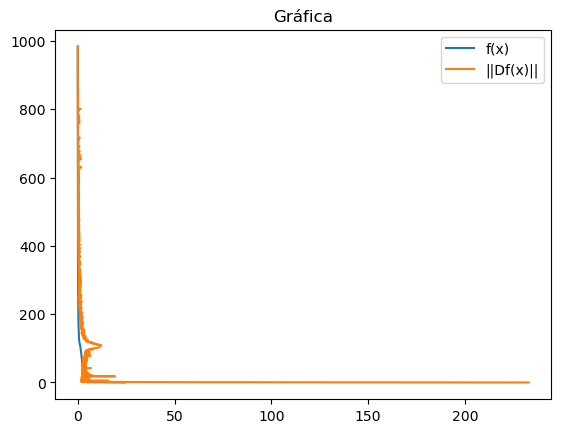

Punto mínimo:  [1. 1.]
Error absoluto:  2.5440024358218176e-12


In [13]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_backtracking(f_Rosenbrock, grad_rosenbrock, x0, max_iter, c, rho, tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

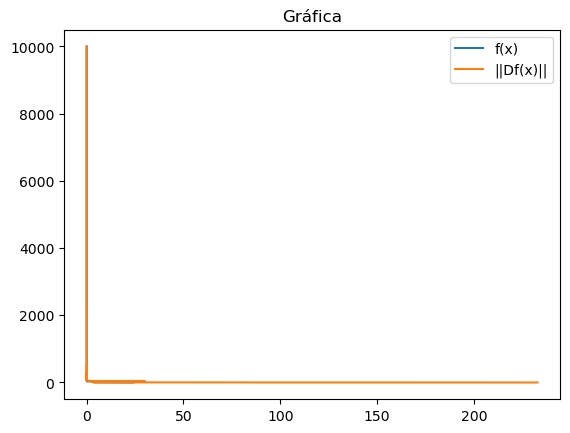

Punto mínimo:  [0.99998853 0.99997705]
Error absoluto:  2.56586551810366e-05


In [99]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_bisection_wolfe(f_Rosenbrock, grad_rosenbrock, x0,c1,c2,max_iter, tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

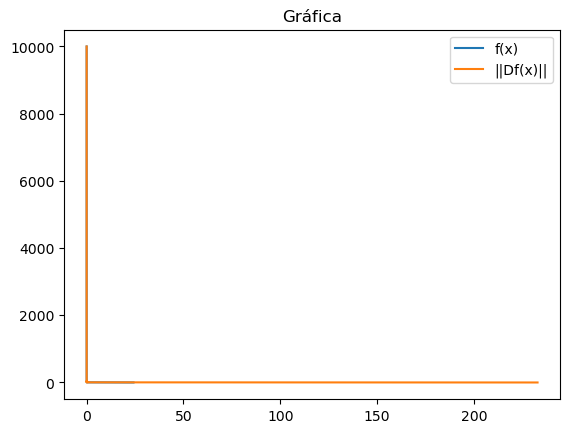

Punto mínimo:  [1.00000174 1.0000035 ]
Error absoluto:  3.909622559356539e-06


In [103]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_zoom(f_Rosenbrock, grad_rosenbrock, x0,c1,c2,max_iter,tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

Probamos con una muestra de $n=100$ puntos

In [14]:

n = 100

#Punto inicial
x0 = np.ones(n)
x0[0] = -1.2
x0[n-2] = -1.2

#Minimo real
x = np.ones(n)

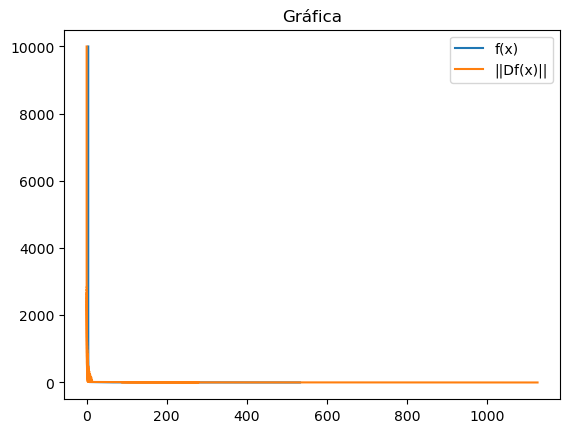

Punto mínimo:  [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979327
  0.99989698  0.99994866  0.99997442  0.99998724  0.99999365  0.99999683
  0.99999843  0.99999921  0.99999962  0.9999998   0.99999991  0.99999994
  0.99999999  0.99999998  1.00000001  0.99999999  1.00000001  0.99999999
  1.00000001  0.99999999  1.00000001  0.99999999  1.00000001  0.99999998
  1.00000002  0.99999998  1.00000002  0.99999998  1.00000002  0.99999998
  1.00000002  0.99999998  1.00000002  0.99999998  1.00000002  0.99999998
  1.00000002  0.99999998  1.00000002  0.99999998  1.00000002  0.99999998
  1.00000002  0.99999998  1.00000002  0.99999998  1.00000002  0.99999998
  1.00000002  0.99999998  1.00000002  0.99999998  1.00000002  0.99999998
  1.00000002  0.99999998  1.00000002  0.99999998  1.00000002  0.99999998
  1.00000002  0.99999998  1.00000002  0.99999998  1.00000002  0.99999998
  1.00000001  0.99999999  1.00000001  0.99999999  1.00000001  0.99999999
  1.00000001  0.99999999  1.00000001

In [15]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_backtracking(f_Rosenbrock, grad_rosenbrock, x0, max_iter, c, rho, tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

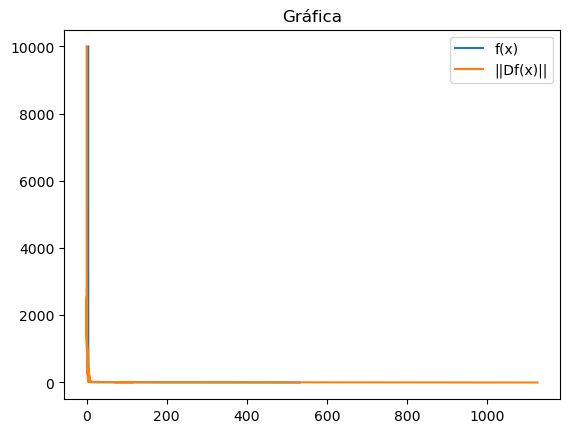

Punto mínimo:  [-0.9932861   0.99665107  0.99833033  0.99916773  0.99958522  0.99979326
  0.999897    0.99994864  0.99997444  0.99998722  0.99999368  0.9999968
  0.99999846  0.99999917  0.99999965  0.99999975  0.99999996  0.9999999
  1.00000003  0.99999993  1.00000006  0.99999993  1.00000007  0.99999993
  1.00000007  0.99999992  1.00000008  0.99999992  1.00000008  0.99999991
  1.00000009  0.99999991  1.00000009  0.99999991  1.0000001   0.9999999
  1.0000001   0.9999999   1.0000001   0.9999999   1.0000001   0.9999999
  1.0000001   0.99999989  1.00000011  0.99999989  1.00000011  0.99999989
  1.00000011  0.99999989  1.00000011  0.99999989  1.00000011  0.99999989
  1.00000011  0.99999989  1.00000011  0.9999999   1.0000001   0.9999999
  1.0000001   0.9999999   1.0000001   0.9999999   1.0000001   0.9999999
  1.00000009  0.99999991  1.00000009  0.99999991  1.00000009  0.99999992
  1.00000008  0.99999992  1.00000008  0.99999993  1.00000007  0.99999993
  1.00000007  0.99999993  1.00000006  0.99

In [106]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_bisection_wolfe(f_Rosenbrock, grad_rosenbrock, x0,c1,c2,max_iter, tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

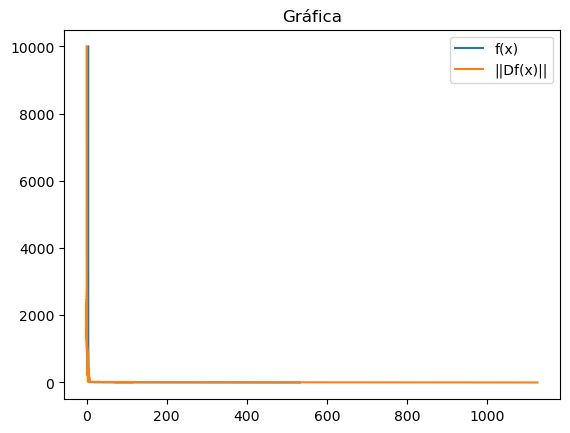

Punto mínimo:  [-0.9932861   0.99665107  0.99833033  0.99916773  0.99958522  0.99979326
  0.999897    0.99994864  0.99997444  0.99998722  0.99999368  0.9999968
  0.99999846  0.99999917  0.99999965  0.99999975  0.99999996  0.9999999
  1.00000003  0.99999993  1.00000006  0.99999993  1.00000007  0.99999993
  1.00000007  0.99999992  1.00000008  0.99999992  1.00000008  0.99999991
  1.00000009  0.99999991  1.00000009  0.99999991  1.0000001   0.9999999
  1.0000001   0.9999999   1.0000001   0.9999999   1.0000001   0.9999999
  1.0000001   0.99999989  1.00000011  0.99999989  1.00000011  0.99999989
  1.00000011  0.99999989  1.00000011  0.99999989  1.00000011  0.99999989
  1.00000011  0.99999989  1.00000011  0.9999999   1.0000001   0.9999999
  1.0000001   0.9999999   1.0000001   0.9999999   1.0000001   0.9999999
  1.00000009  0.99999991  1.00000009  0.99999991  1.00000009  0.99999992
  1.00000008  0.99999992  1.00000008  0.99999993  1.00000007  0.99999993
  1.00000007  0.99999993  1.00000006  0.99

In [107]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_zoom(f_Rosenbrock, grad_rosenbrock, x0,c1,c2,max_iter,tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

# Función Wood

In [108]:
#Función Wood

def f_wood(x):
    evaluation = 100*(x[0]**2 - x[1])**2 + (x[0] - 1)**2 + (x[2] - 1)**2 + 90*(x[2]**2 - x[3])**2 + 10.1*((x[1] - 1)**2 + (x[3] - 1)**2) + 19.8*(x[1] - 1)*(x[3] - 1) 
    return evaluation 


def Df_wood(x):
    Df = np.zeros(4)
    Df[0] = 400*x[0]**3 - 400*x[0]*x[1] + 2*(x[0]-1)
    Df[1] = 200*(x[1] - x[0]**2) + 20.2*(x[1] - 1) + 19.8*(x[3] - 1)
    Df[2] = 360*x[2]**2-360*x[2]*x[3]+2*x[2]-2
    Df[3] =  -180*(x[2]**2-x[3]) + 20.2*(x[3] - 1) + 19.8*(x[1] - 1)
    
    return Df

In [109]:
#Creamos el punto inicial y el aleatorio 

#NOTA: voy a utilizar el punto incial (0,0,0,0) ya que es con el que logra darme un resultado
#mi método, con el punto propuesto ni si quiera terminaba 
x0 = np.zeros(4)
x = np.ones(4)

max_iter = 10000
c = 1e-4
rho = 0.1
tol = 1e-12
c1 = 1e-4
c2 = 0.9

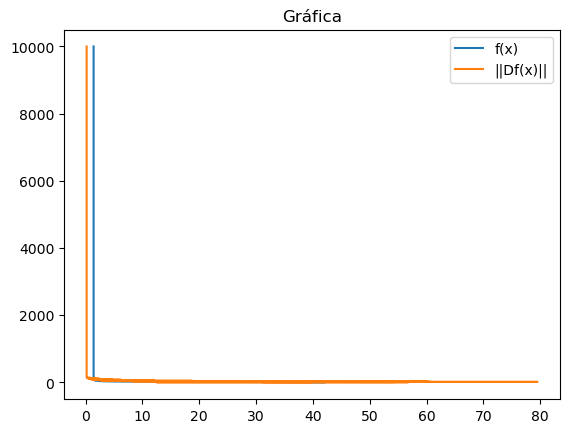

Punto mínimo:  [1.39381675 1.94423662 0.07871993 0.01318271]
Error absoluto:  1.6938830347939777


In [110]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_backtracking(f_wood,Df_wood, x0, max_iter, c, rho, tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

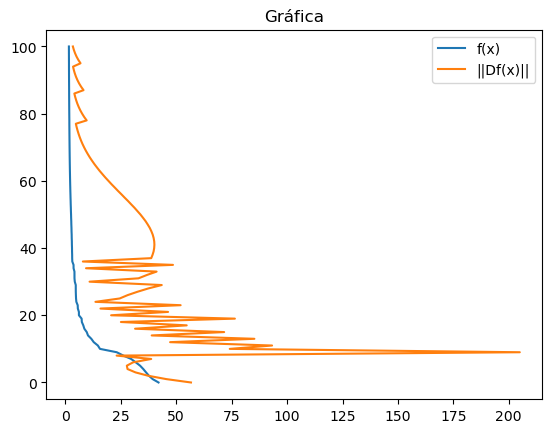

Punto mínimo:  [ 1.44221032  2.08438974  0.06762915 -0.00339218]
Error absoluto:  1.802099424103706


In [111]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_bisection_wolfe(f_wood, Df_wood, x0,c1,c2,100, tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

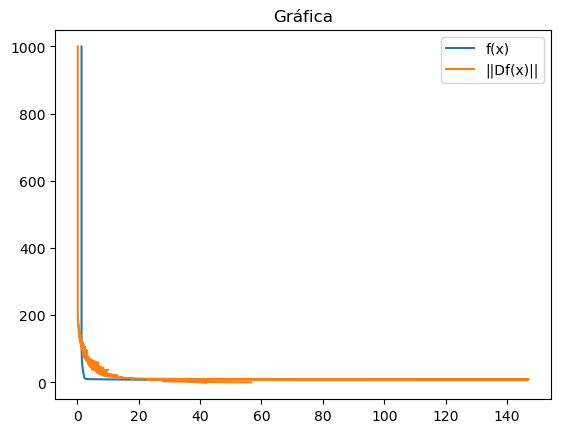

Punto mínimo:  [1.39386987 1.94436625 0.07870878 0.01316686]
Error absoluto:  1.6939829567975646


In [112]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
x_min = steepest_descent_zoom(f_wood, Df_wood, x0,c1,c2,1000,tol)

print("Punto mínimo: ", x_min)
print("Error absoluto: ", LA.norm(x-x_min))

# Tercera función de prueba

In [116]:
#Generamos nuestra muestra normal
n=128
sigma = 1
s = np.random.normal(0, sigma,n)

#Creamos nuestro conjunto de datos y
t = [(2*(i-1))/(n-1)-1 for i in range(1,n+1)]
y = [t[i]**2+s[i] for i in range(0,n)]

x0 = np.ones(n)

In [117]:
#Definimos la función f

def f(x):
    sum1 = sum([(x[i]-y[i])**2 for i in range(0,n)])
    sum2 = sum([(x[i+1]-x[i])**2 for i in range(0,n-1)])
    return sum1 + lamd*sum2

def Df(x):
    grad_f = np.zeros(n)
    grad_f[0] = 2*(x[0]-y[0]) + 2*lamd*(x[1]-x[0])
    grad_f[n-1] = 2*(x[n-1]-y[n-1]) + 2*lamd*(x[n-1]-x[n-2])
    
    for i in range(1,n-1):
        grad_f[i] = 2*(x[i]-y[i]) + 2*lamd*(x[i]-x[i-1]) - 2*lamd*(x[i+1]-x[i])
        
    return grad_f

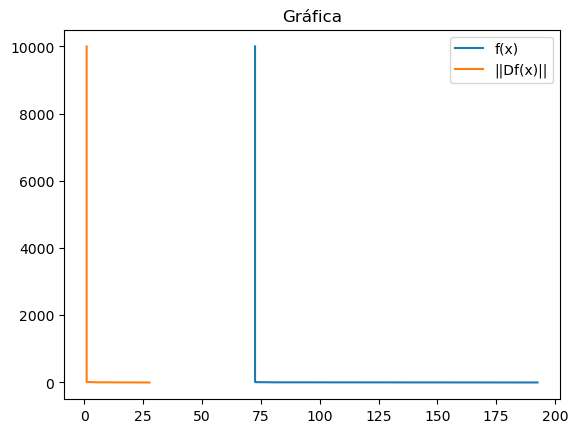

Punto mínimo:  [-5.24153439e-01  5.92280472e-02  5.24091141e-01  1.21732895e+00
  1.21355834e+00  1.00754030e+00  1.09276076e+00  1.26026898e+00
  7.20256453e-01  6.72076764e-01  1.26289208e+00  9.91458787e-01
  1.49077771e+00  1.52209797e+00  1.23507753e+00  9.68561739e-01
  1.59503972e+00  1.28712584e+00  1.50087395e+00  1.12808184e+00
  4.72337456e-01 -2.02376420e-01  1.05284711e-01  1.05611937e+00
  1.07311060e+00  1.07946766e+00  8.94860724e-01  5.57856493e-01
  3.52285882e-01  2.91674288e-01  1.99489863e-01 -1.78273058e-01
 -3.03034373e-01 -7.90400223e-02 -4.45698260e-01 -5.50369286e-01
 -2.60713570e-01  2.81467849e-01  1.92948284e-01  5.67564239e-01
  1.21780324e+00  8.73268873e-01  1.14124201e+00  1.85258873e+00
  1.88609164e+00  1.78810437e+00  1.41972553e+00  1.11673581e-01
  2.68615032e-01 -3.85529428e-01  9.96391177e-02 -6.73517883e-03
 -5.15069624e-01 -1.81726519e-01 -1.73584805e-01 -4.47277850e-01
 -3.98785010e-03  2.93896195e-01  3.09177234e-01  2.79040504e-01
  3.316457

In [115]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
lamd = 1
x_min = steepest_descent_backtracking(f, Df, x0, 10000, 1e-4, 0.1, 1e-10)


print("Punto mínimo: ", x_min)
print("Norma del gradiente: ", LA.norm(Df(x_min)))

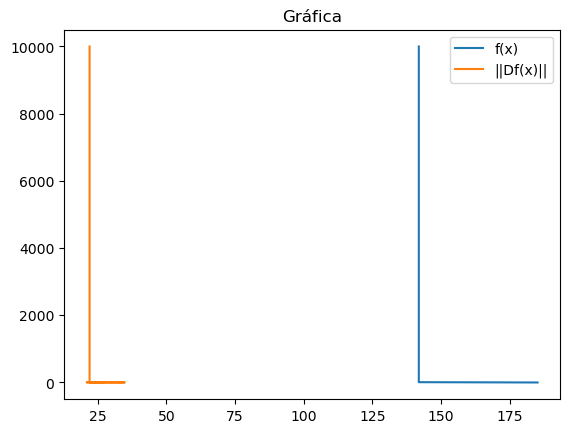

Punto mínimo:  [0.01473    0.78836207 1.00936074 1.06835098 1.05491281 1.0723442
 1.08866279 0.95400547 1.02480938 1.07174526 1.11387848 1.10389102
 0.97860312 0.92482474 0.96318944 1.02447184 1.00343052 1.02914555
 0.96716592 0.90308655 0.92560252 0.86986382 0.75393975 0.733219
 0.73890231 0.74073511 0.80487005 0.67248254 0.62007437 0.71353986
 0.85385362 0.77767536 0.6682202  0.73680293 0.74737009 0.77648784
 0.75877588 0.70734464 0.75565603 0.82733244 0.75725162 0.65212585
 0.55938582 0.56178509 0.56815811 0.4749145  0.48065388 0.50296214
 0.57453889 0.49748753 0.55256139 0.65028781 0.87962762 1.03574358
 1.01871519 0.89838006 0.82068549 0.73650497 0.79792682 0.75358667
 0.6276991  0.70344654 0.69871767 0.7107156  0.72231297 0.68820892
 0.65196656 0.63427078 0.74876505 0.73671496 0.75000889 0.65849865
 0.50142154 0.38654511 0.46300991 0.60615492 0.71203836 0.73531924
 0.70251669 0.51433586 0.44088703 0.5231366  0.68082606 0.81183513
 0.81151429 0.82629602 0.8019315  0.80311968 0.703

In [118]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
lamd = 10
x_min = steepest_descent_backtracking(f, Df, x0, 10000, 1e-4, 0.1, 1e-10)


print("Punto mínimo: ", x_min)
print("Norma del gradiente: ", LA.norm(Df(x_min)))

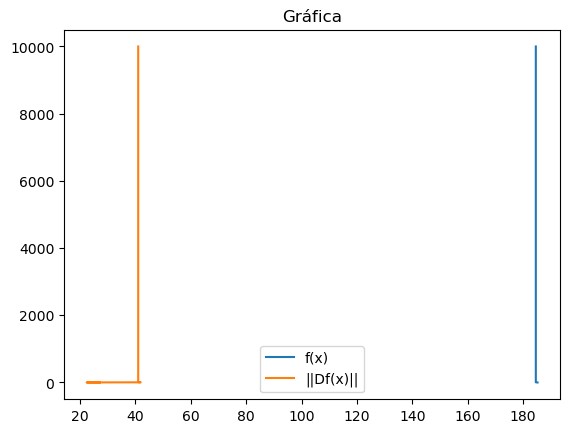

Punto mínimo:  [0.97719348 0.99174505 0.99822571 1.00099841 1.00124031 1.00077475
 1.00085005 1.00027716 1.00096435 1.00093963 1.00099089 1.00086818
 1.00018098 0.99979728 0.99959265 0.99993531 0.99985328 1.00000545
 0.99956347 0.99887244 0.99825508 0.99738404 0.99653096 0.99621582
 0.99601188 0.99548253 0.99558792 0.99513359 0.99546005 0.99544901
 0.99581848 0.99594421 0.99580149 0.99598514 0.99556363 0.99579794
 0.99602927 0.99607192 0.99614614 0.99600786 0.99530744 0.99471631
 0.99365488 0.992747   0.99233497 0.99191522 0.99214466 0.99176646
 0.99223243 0.9923209  0.99386501 0.99530836 0.9973676  0.9987833
 0.99917447 0.99850889 0.99778947 0.99639462 0.9959436  0.99556649
 0.9949428  0.99526819 0.9949234  0.99513705 0.99508237 0.99477463
 0.99485328 0.9947418  0.99549217 0.99525229 0.99498367 0.99366574
 0.99246965 0.99173503 0.99213504 0.99321454 0.99442096 0.99455786
 0.99410671 0.9928932  0.99264587 0.99311945 0.99425423 0.99584409
 0.99666756 0.99713207 0.9965561  0.99644671 0.9

In [119]:
#Aplicamos el algoritmo de máximo descenso con backtracking 
lamd = 1000
x_min = steepest_descent_backtracking(f, Df, x0, 10000, 1e-4, 0.1, 1e-10)


print("Punto mínimo: ", x_min)
print("Norma del gradiente: ", LA.norm(Df(x_min)))